# Cluster analysis of smoothed output of CAE

This notebook contains cluster analysis of the smoothed latent representation of S2 tensor set. It an access to a GPU. 

The NVIDIA Docker container RAPIDS 21.02 was used to generate a computational environment. Addionally, we have install `clustergram`, `bokeh` and `geopandas` packages into the environment.

In [ ]:
import cudf
from clustergram import Clustergram
from cuml import KMeans

import geopandas as gpd

In [ ]:
df2 = cudf.read_csv("sentinel_gb_encoder_map_3_20210317_smoothed.csv", index_col=0)
df2

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,,,,,,,,,,,,,,,,,,,,,
0,-0.770545,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,0.166684,-0.482501,0.716499,0.802213,...,-1.021918,-1.021918,0.521594,1.821019,0.285933,1.142556,0.880970,-0.056022,1.347258,0.740189
1,-0.713605,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,0.209668,-0.478455,0.730334,0.761889,...,-1.021918,-1.021918,0.546692,1.853168,0.224142,1.161032,0.933931,-0.041017,1.347816,0.717626
2,-0.710462,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,0.216409,-0.474210,0.707004,0.775565,...,-1.021918,-1.021918,0.538287,1.847791,0.230423,1.159471,0.943069,-0.038224,1.347237,0.716002
3,-0.667177,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,0.258957,-0.411789,0.612215,0.723985,...,-1.021918,-1.021918,0.539012,1.828751,0.191889,1.268800,1.077507,-0.040975,1.368325,0.729411
4,-0.761786,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,0.191168,-0.466464,0.708103,0.847477,...,-1.021918,-1.021918,0.535747,1.828982,0.281086,1.133979,0.865725,-0.064003,1.363609,0.754490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710710,-0.566200,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,1.193087,0.183391,0.586106,0.618853,...,-1.021918,-1.021918,0.791859,2.045599,0.347751,1.565551,1.329648,-0.137052,1.720185,1.049834
1710711,-0.573979,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,1.137767,0.207727,0.074039,1.476398,...,-1.021918,-1.021918,0.580608,2.153314,0.645979,2.169570,1.541993,-0.042402,1.831937,1.290274
1710712,-0.533066,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,1.019940,0.225325,-0.064241,1.567293,...,-1.021918,-1.021918,0.669177,2.436414,0.492457,1.875219,1.644542,-0.434694,1.741383,1.052425


In [ ]:
cgram2 = Clustergram(range(1, 20), backend="cuML", random_state=42, n_init=100)
cgram2.fit(df2)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 201.57732391357422 seconds.
K=3 fitted in 177.62315583229065 seconds.
K=4 fitted in 279.7808632850647 seconds.
K=5 fitted in 287.38376355171204 seconds.
K=6 fitted in 360.75590348243713 seconds.
K=7 fitted in 366.44285583496094 seconds.
K=8 fitted in 449.11415791511536 seconds.
K=9 fitted in 517.179682970047 seconds.
K=10 fitted in 546.6864213943481 seconds.


In [ ]:
labels = cgram2.labels
labels

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,2,3,4,5,5,2,3,2,3,0,12,6,7,8,0,14,9
1,0,1,2,3,4,5,5,7,3,2,3,0,12,6,7,8,0,14,9
2,0,1,2,3,4,5,5,7,3,2,3,0,12,6,7,8,0,14,9
3,0,1,2,3,4,5,4,7,3,2,3,0,12,6,7,8,0,14,9
4,0,1,2,3,4,5,5,7,3,2,3,0,12,6,7,8,0,14,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710710,0,0,0,2,1,4,6,4,0,8,2,1,2,10,8,0,4,6,14
1710711,0,0,0,2,3,3,1,1,7,1,10,9,9,12,0,9,5,5,18
1710712,0,0,0,2,3,3,1,1,7,1,10,9,9,12,0,9,5,5,18
1710713,0,0,0,2,3,4,6,4,4,9,5,1,2,10,8,0,4,6,5


In [ ]:
labels.to_csv("sentinel_gb_encoder_map_3_20210317_smoothed_clustergram_labels.csv")

CPU times: user 1.13 s, sys: 181 ms, total: 1.31 s
Wall time: 1.32 s


<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

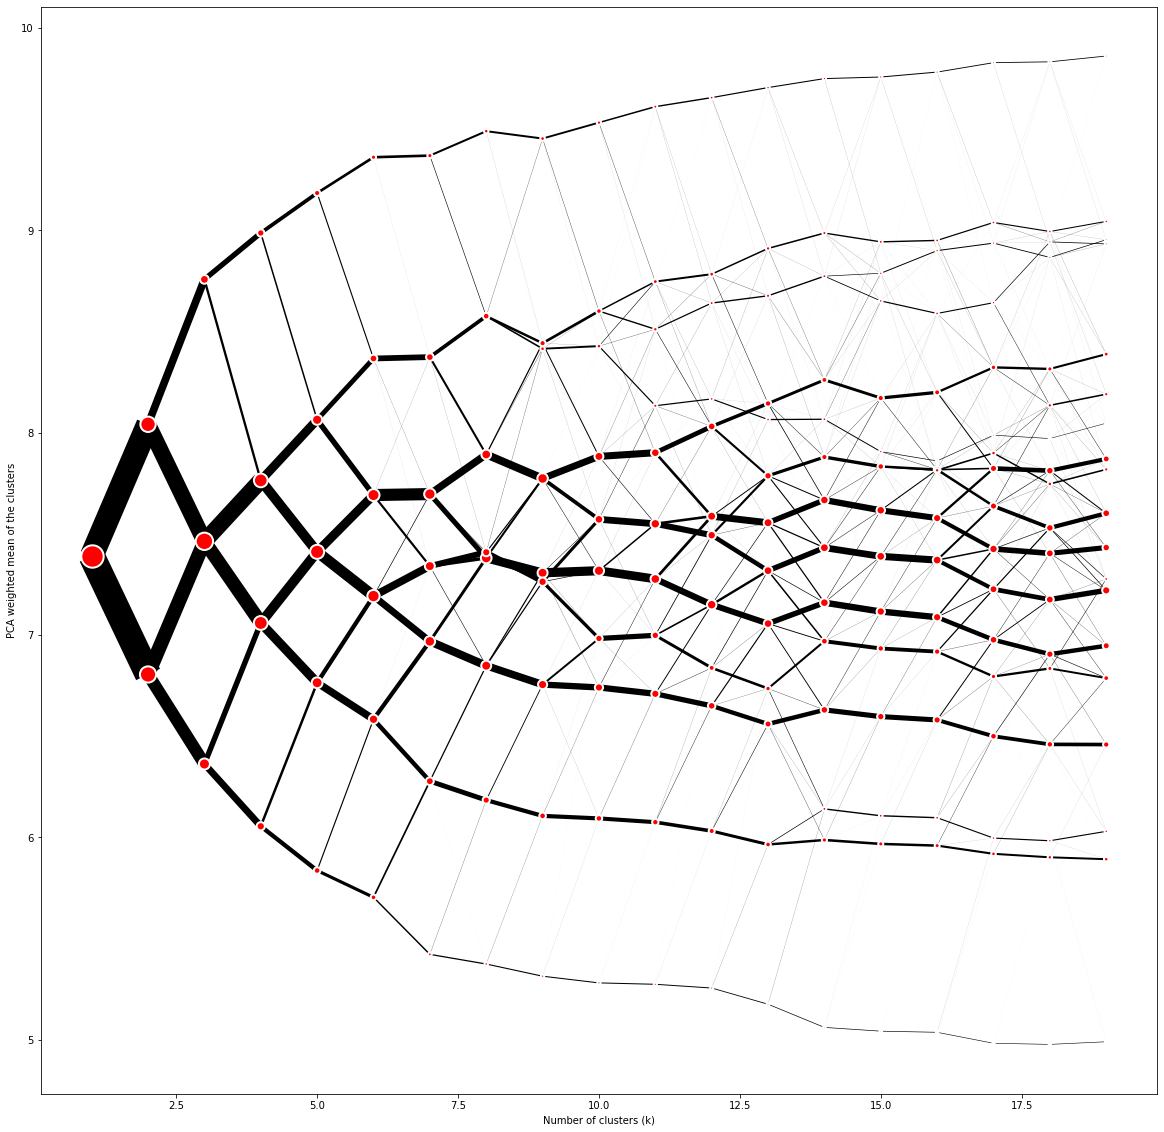

In [ ]:
%%time
cgram2.plot(figsize=(20, 20), pca_weighted=True)

CPU times: user 773 ms, sys: 177 ms, total: 950 ms
Wall time: 947 ms


<AxesSubplot:xlabel='Number of clusters (k)', ylabel='Mean of the clusters'>

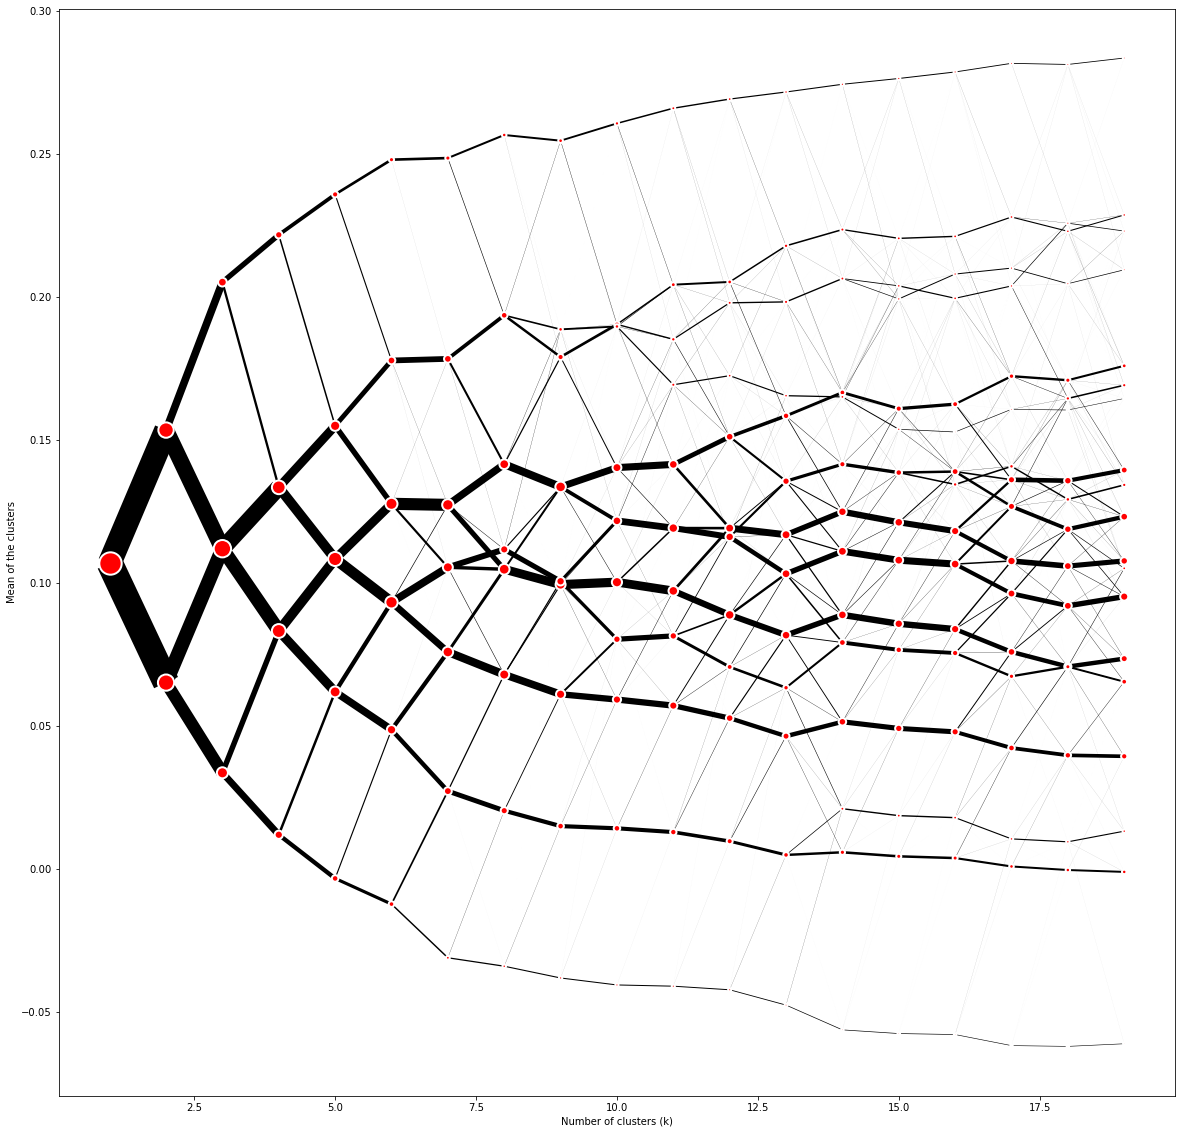

In [ ]:
%%time
cgram2.plot(figsize=(20, 20), pca_weighted=False)

In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [ ]:
fig = cgram2.bokeh(figsize=(1000, 800))
show(fig)

In [ ]:
fig = cgram2.bokeh(figsize=(1000, 800), pca_weighted=False)
show(fig)

In [ ]:
geom = gpd.read_parquet('postcodes/postcode_geom_osgb.pq')

In [ ]:
geom

,PCDS,UTM_ZONE,UTM_X,UTM_Y,geometry
0,AB10 1AB,30,554639.18,6334401.32,POINT (394235.441 806530.784)
1,AB10 1AF,30,554586.65,6334300.54,POINT (394181.440 806430.784)
2,AB10 1AG,30,554634.67,6334339.47,POINT (394230.026 806469.006)
3,AB10 1AH,30,554777.68,6334233.27,POINT (394371.467 806360.721)
4,AB10 1AL,30,554699.01,6334452.44,POINT (394296.014 806581.022)
...,...,...,...,...,...
1710710,ZE3 9JU,30,594727.85,6640320.72,POINT (438872.230 1111806.351)
1710711,ZE3 9JW,30,594857.56,6638553.33,POINT (438975.215 1110037.332)
1710712,ZE3 9JX,30,594751.87,6638732.79,POINT (438872.255 1110218.355)
1710713,ZE3 9JY,30,594350.53,6640537.04,POINT (438498.246 1112028.331)


In [ ]:
km = KMeans(n_clusters=7, n_init=10_000, random_state=42, verbose=1)
km.fit(df2)

KMeans()

In [ ]:
lab = cudf.DataFrame(km.labels_)
lab["PCDS"] = geom.PCDS.values
lab

,0,PCDS
0,0,AB10 1AB
1,0,AB10 1AF
2,2,AB10 1AG
3,2,AB10 1AH
4,0,AB10 1AL
...,...,...
1710710,4,ZE3 9JU
1710711,3,ZE3 9JW
1710712,3,ZE3 9JX
1710713,4,ZE3 9JY


In [ ]:
lab.to_csv("sentinel_gb_encoder_map_3_20210317_smoothed_10k_labels.csv")